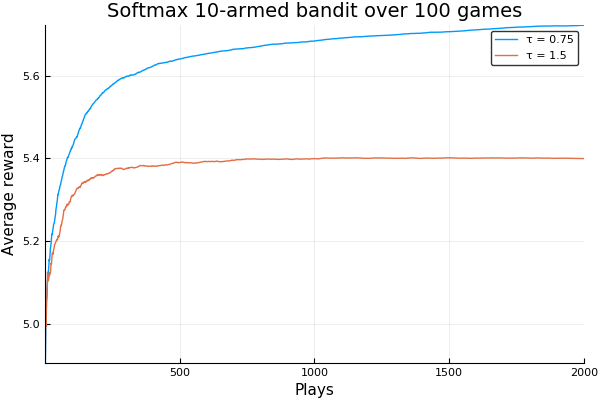

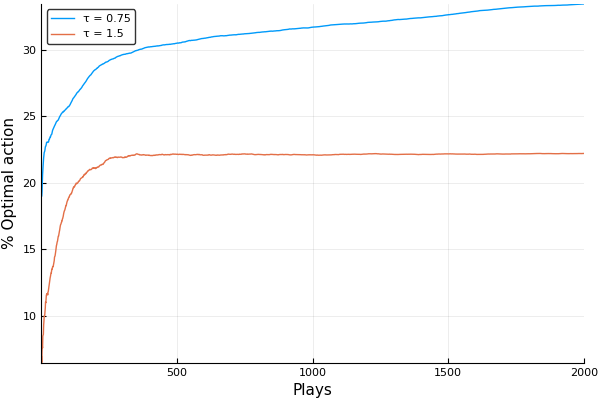

Action rewards = [3.33333, 3.66667, 4.0, 4.33333, 4.66667, 5.0, 5.33333, 5.66667, 6.0, 6.33333]


In [3]:
using Plots


function softmax_bandit(N,T,tau,Qmean)
    """
    RUN ONE SOFTMAX GAME OF N-ARMED BANDIT
    
    Arguments:  N - Number of arms (1 x 1)
                T - Number of plays (1 x 1)
                tau - Action "temperature" (meas. of similarity) (1 x 1)
                Qmean - (N x 1)
    
    Returns:    reward - History of actions and values (N x T)
                perc_opt - Percentage of optimal actions (T x 1)
    """
    
    # Initialize rewards, action counts, and optimal percentage
    reward = zeros(N,T)
    perc_opt = zeros(T)
    acount = zeros(N)

    # Randomly assign first action and  reward
    a0 = randperm(N)[1]
    reward[a0,1] = randn() + Qmean[a0]
    acount[a0] += 1
    perc_opt[1] = acount[N]*100

    # Assign subsequent actions and rewards
    for t = 2:T
        # Compute probabilities of actions
        Qt = sum(reward,2)./max.(acount,1)
        prob = exp.(Qt/tau)/sum(exp.(Qt/tau))
        r = rand()
        
        for a = 1:N
            # Choose action from probabilities
            if a == 1
                if r < prob[a]
                    reward[a,t] = randn() + Qmean[a]
                    acount[a] += 1
                    perc_opt[t] = acount[N]/t*100
                end
            else
                p1 = sum(prob[1:a-1])
                p2 = sum(prob[1:a])
                if r >= p1 && r < p2
                    reward[a,t] = randn() + Qmean[a]
                    acount[a] += 1
                    perc_opt[t] = acount[N]/t*100
                end
            end
        end
    end
    
    return reward, perc_opt
end


function main()
    # Set up problem
    N = 10      # N-arm bandit
    T = 2000    # T plays per game

    # Assign mean reward values per arm
    Qmean = collect(10:N+9)/3
    println("Action rewards = ", Qmean)

    # Play softmax games
    Ngames = 100
    
    reward_val1 = zeros(T); reward_val2 = zeros(T);
    perc_opt1 = zeros(T); perc_opt2 = zeros(T);
    tau1 = 0.75; tau2 = 1.5;
    
    for i = 1:Ngames
        # τ = tau1
        reward, perc_opt = softmax_bandit(N,T,tau1,Qmean)
        reward_val1 += sum(reward,1)'
        perc_opt1 += perc_opt
        
        # τ = tau2
        reward, perc_opt = softmax_bandit(N,T,tau2,Qmean)
        reward_val2 += sum(reward,1)'
        perc_opt2 += perc_opt
    end
    
    # Calculate average rewards
    avg_reward1 = zeros(T); avg_reward2 = zeros(T);
    
    for t = 1:T
        avg_reward1[t] = sum(reward_val1[1:t])/Ngames/t
        avg_reward2[t] = sum(reward_val2[1:t])/Ngames/t
    end
    
    # Calculate optimal percentages
    perc_opt1 = perc_opt1/Ngames
    perc_opt2 = perc_opt2/Ngames

    pyplot()
    t = 1:T
    
    # Plot average rewards
    plt1 = plot(t,avg_reward1, xlabel="Plays", ylabel="Average reward", label="τ = $(tau1)")
    plt1 = plot!(t,avg_reward2, label="τ = $(tau2)")
    title!("Softmax $N-armed bandit over $(Ngames) games")
    display(plt1)
    
    # Plot optimal percentages
    plt2 = plot(t,perc_opt1, xlabel="Plays", ylabel="% Optimal action", label="τ = $(tau1)")
    plt2 = plot!(t,perc_opt2, label="τ = $(tau2)")
    display(plt2)
end


main()